In [ ]:
!pip install diffusers transformers torch accelerate pillow

In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import os
import warnings
import logging
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
from IPython.display import display  # Import for inline display

# Suppress future warnings and reduce extra logging messages
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("diffusers").setLevel(logging.ERROR)

In [ ]:
def generate_painting_from_sketch(
    sketch_path: str,
    prompt: str,
    output_path: str = "outputs/detailed_painting.png",
    strength: float = 0.75,
    guidance_scale: float = 7.5
):
    """
    Converts a simple sketch into a detailed AI-generated painting.

    Parameters:
      sketch_path (str): Path to the input sketch image.
      prompt (str): Text prompt describing the desired detailed painting.
      output_path (str): Path where the output image is saved.
      strength (float): Transformation strength (0.0: minimal change, 1.0: full transformation).
      guidance_scale (float): Controls how strictly the output adheres to the prompt.
    """
    # Use a default prompt if none is provided.
    if not prompt.strip():
        print("No prompt provided. Using default prompt: 'A detailed painting'")
        prompt = "A detailed painting"

    model_id = "runwayml/stable-diffusion-v1-5"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the Stable Diffusion img2img pipeline with half precision for speed if GPU is available.
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to(device)

    # Open and preprocess the sketch image.
    init_image = Image.open(sketch_path).convert("RGB")
    init_image = init_image.resize((512, 512))

    # Generate the detailed painting.
    result = pipe(
        prompt=prompt,
        image=init_image,  # Pass init_image as a named argument
        strength=strength,
        guidance_scale=guidance_scale
    )
    painting = result.images[0]

    # Ensure the output directory exists.
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    painting.save(output_path)
    print(f"\nDetailed painting saved as: {output_path}")

    # Display the painting inline in Colab.
    display(painting)

In [ ]:
def main():
    print("Welcome to the Sketch-to-Painting Converter!")
    sketch_path = input("Enter the path to your sketch image: ").strip()
    prompt = input("Enter a descriptive prompt for the detailed painting: ").strip()

    try:
        strength_input = input("Enter strength (0.0 to 1.0) [default 0.75]: ").strip()
        strength = float(strength_input) if strength_input else 0.75
    except ValueError:
        print("Invalid strength input, using default 0.75.")
        strength = 0.75

    try:
        guidance_input = input("Enter guidance scale [default 7.5]: ").strip()
        guidance_scale = float(guidance_input) if guidance_input else 7.5
    except ValueError:
        print("Invalid guidance scale input, using default 7.5.")
        guidance_scale = 7.5

    output_path = input("Enter the output filename (e.g., detailed_painting.png) [default outputs/detailed_painting.png]: ").strip()
    if not output_path:
        output_path = "outputs/detailed_painting.png"

    generate_painting_from_sketch(sketch_path, prompt, output_path, strength, guidance_scale)
    print("Process complete!")

Welcome to the Sketch-to-Painting Converter!
Enter the path to your sketch image: /content/flowers.jpg
Enter a descriptive prompt for the detailed painting: 
Enter strength (0.0 to 1.0) [default 0.75]: 
Enter guidance scale [default 7.5]: 
Enter the output filename (e.g., detailed_painting.png) [default outputs/detailed_painting.png]: 
No prompt provided. Using default prompt: 'A detailed painting'


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]


Detailed painting saved as: outputs/detailed_painting.png


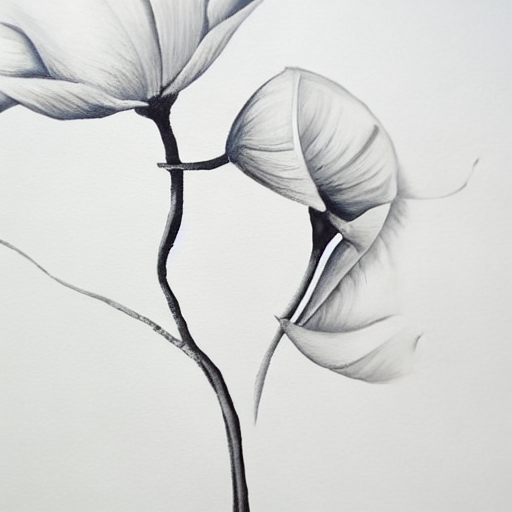

Process complete!


In [ ]:
if __name__ == "__main__":
    main()